### Descriptive Statistics

Functions & Description
Let us now understand the functions under Descriptive Statistics in Python Pandas. The following table list down the important functions −

|Sr.No.|Function|Description|
| :- | -: | :-: |
|1|count()|Number of non-null observations|
|2|sum()|Sum of values|
|3|mean()|Mean of Values
|4|median()|Median of Values
|5|mode()|Mode of values
|6|std()|Standard Deviation of the Values
|7|min()|Minimum Value
|8|max()|Maximum Value
|9|abs()|Absolute Value
|10|prod()|Product of Values
|11|cumsum()|Cumulative Sum
|12|cumprod()|Cumulative Product

Note − Since DataFrame is a Heterogeneous data structure. Generic operations don’t work with all functions.

1. Functions like sum(), cumsum() work with both numeric and character (or) string data elements without any error. Though n practice, character aggregations are never used generally, these functions do not throw any exception.

2. Functions like abs(), cumprod() throw exception when the DataFrame contains character or string data because such operations cannot be performed.

3. Summarizing Data
The describe() function computes a summary of statistics pertaining to the DataFrame columns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include = 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
# measures of central tendency - MMM

In [10]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [8]:
df.dtypes[df.dtypes!='object'].index.tolist()

['age', 'bmi', 'children', 'charges']

In [9]:
c1 = 'age'
c2 = 'bmi'
c3 = 'charges'

In [12]:
cont_cols = [c1,c2,c3]
cont_cols

['age', 'bmi', 'charges']

In [20]:
np.mean(df[c1]), np.median(df[c1]), df[c1].mode()[0] #mode gives a series, so use [0] to get the value

(39.20702541106129, 39.0, 18)

In [ ]:
# mode < median < mean

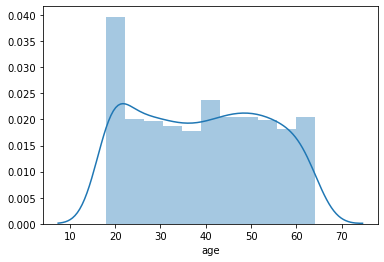

In [21]:
sns.distplot(df[c1])

In [22]:
c2

'bmi'

In [24]:
np.mean(df[c2]), np.median(df[c2]), df[c2].mode()[0]

(30.663396860986538, 30.4, 32.3)

In [25]:
# mode > mean ~ median

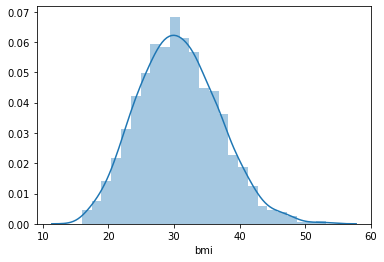

In [26]:
sns.distplot(df[c2])

In [27]:
c3

'charges'

In [28]:
np.mean(df[c3]), np.median(df[c3]), df[c3].mode()[0]

(13270.422265141257, 9382.033, 1639.5631)

In [ ]:
# mode < median < mean

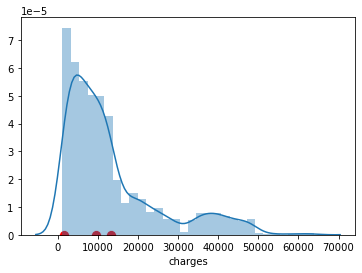

In [34]:
sns.distplot(df[c3])
sns.scatterplot([np.mean(df[c3]), np.median(df[c3]), df[c3].mode()[0]], [0,0,0], color = 'red', s = 100)
plt.show()

In [33]:
# histogram - measure of frequency for continuous data

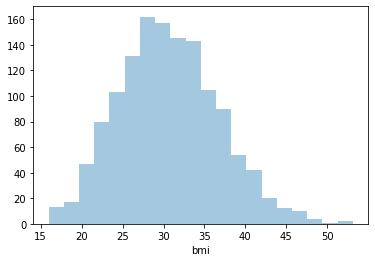

In [41]:
sns.distplot(df[c2], kde = False, bins = 20) 

In [ ]:
## measures of frequency for discrete data

In [42]:
obj_cols = df.select_dtypes('object').columns.tolist()
obj_cols

['sex', 'smoker', 'region']

In [43]:
cat_cols = obj_cols + ['children'] # children is discrete
cat_cols

['sex', 'smoker', 'region', 'children']

In [50]:
# df['region'].value_counts()/df.shape[0]

In [51]:
print('Column: mode, freq, prop')
print('----')

for i in cat_cols:
    
    f = df[i].value_counts()[0]
    p = round(f/df.shape[0],2)
    
    print(i, ':' , df[i].mode()[0], ',', f, ',', p)

Column: mode, freq, prop
----
sex : male , 676 , 0.51
smoker : no , 1064 , 0.8
region : southeast , 364 , 0.27
children : 0 , 574 , 0.43


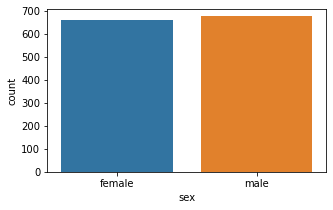

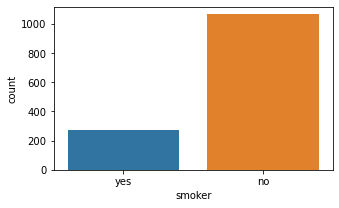

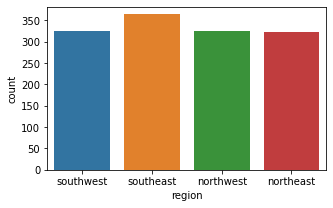

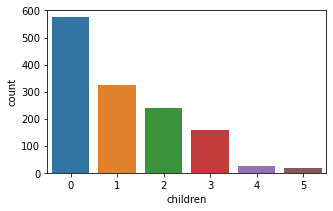

In [52]:
for i in cat_cols:
    plt.figure(figsize = (5,3))
    sns.countplot(df[i])
    plt.show()